# Fit the RLDDM on individual data

In [1]:
import rlssm
import pandas as pd

## Import the data

In [2]:
# import some example data:
data = rlssm.load_example_dataset(hierarchical_levels = 1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,23,1,1,39,33,2,1,1,1.305523,0
1,23,1,2,50,41,3,1,1,0.916909,1
2,23,1,3,44,43,4,2,1,0.737469,0
3,23,1,4,51,30,3,1,2,0.764511,0
4,23,1,5,62,48,4,3,2,0.721492,1


## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = rlssm.RLDDModel(hierarchical_levels=1,
                        separate_learning_rates=False,
                        threshold_modulation=False,
                        nonlinear_mapping=True)

20:55:30 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin
20:55:45 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin
20:55:45 - cmdstanpy - WARNING - Stan compiler has produced 12 warnings:
20:55:45 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 4, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag

## Fit

In [4]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # intitial learning value (Q0)

In [5]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

20:55:46 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 1, 'sd': 50}
drift_asymptote_priors {'mu': 1, 'sd': 50}
threshold_priors {'mu': 1, 'sd': 5}
ndt_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

20:56:33 - cmdstanpy - INFO - CmdStan done processing.
20:56:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Random variable  = 1.30552, but must be greater than nondecision time = 1.34712 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.30552, but must be greater than nondecision time = 1.31069 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.30552, but must be greater than nondecision time = 1.95521 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Boundary separation[1] is inf, but must be positive finite! (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wien


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 6000 iterations ended with a divergence (0.0%)


### get Rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.000440,lp__
alpha,1.000660,alpha
drift_scaling,1.000690,drift_scaling
drift_asymptote,0.999863,drift_asymptote
threshold,1.000400,threshold
...,...,...
log_lik[236],1.000330,log_lik[236]
log_lik[237],1.000170,log_lik[237]
log_lik[238],0.999742,log_lik[238]


### get wAIC

In [7]:
model_fit.waic

{'lppd': -198.22569479465193,
 'p_waic': 4.416801750856384,
 'waic': 405.28499309101664,
 'waic_se': 30.95639999720455}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_alpha,transf_drift_scaling,transf_drift_asymptote,transf_threshold,transf_ndt
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.054416,1.144963,2.926137,2.418319,0.567141
std,0.024692,0.624364,0.237828,0.114478,0.018212
min,0.006909,0.340403,2.099260,2.063650,0.472677
25%,0.036493,0.770248,2.761048,2.340402,0.555944
50%,0.049934,0.986978,2.922475,2.415285,0.568367
75%,0.068047,1.312710,3.081085,2.490780,0.579732
max,0.212006,7.341780,3.867390,2.877720,0.621074


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

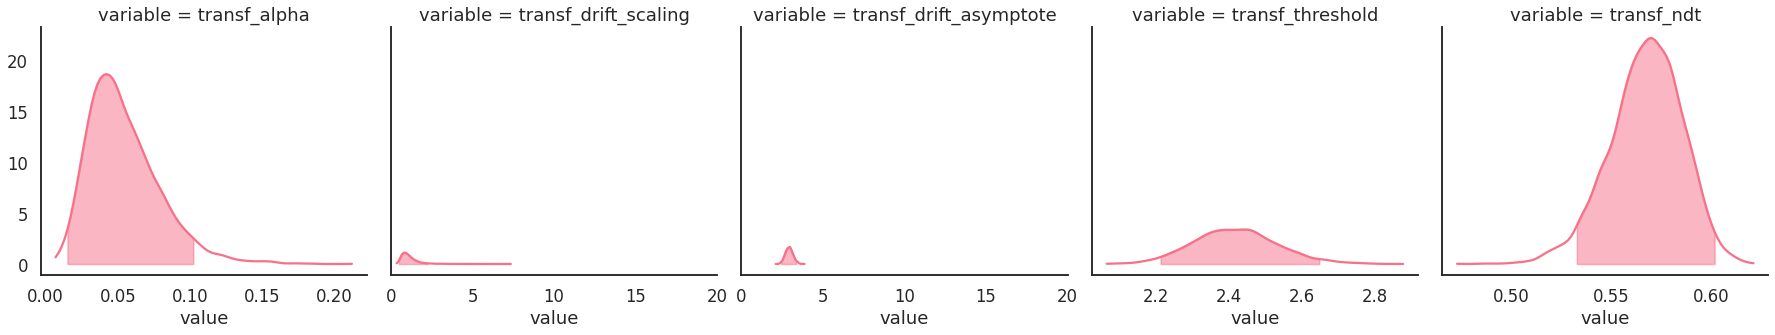

In [10]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI');

g.axes.flat[1].set_xlim(0, 20)
g.axes.flat[2].set_xlim(0, 20);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.271936  1.338936  0.988936  3.170936  1.777936  2.086936   
2         1.793824  1.263824  0.957824  1.000824  1.451824  1.151824   
3         2.800606  1.493606  1.642606  1.498606  0.902606  1.686606   
4         1.584870  2.088870  3.519870  1.206870  2.887870  1.534870   
5         2.112332  3.057332  2.434332  1.903332  0.991332  0.871332   
...            ...       ...       ...       ...       ...       ...   
96        1.903858  4.247858  1.336858  0.985858  1.055858  1.144858   
97        1.056122  2.126122  1.289122  2.363122  1.362122  1.412122   
98        3.317311  1.100311  1.091311  1.969311  2.699311  0.930311   
99        1.394582  3.668582  0.971582  3.922582  1.123582  1.093582   
100       3.381681  1.314681  2.049681  2.396681  2.953681  1.486681   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.591936  1.986936  2.352936  1.616936  ...      1.0  1.0  1.0  1.0   
2         1.106824  0.835824  1.000824  0.737824  ...      1.0  1.0  1.0  1.0   
3         2.923606  2.151606  2.208606  3.508606  ...      1.0  1.0  1.0  1.0   
4         1.893870  3.507870  6.151870  8.966870  ...      1.0  1.0  1.0  1.0   
5         2.267332  0.806332  2.108332  0.954332  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.978858  1.929858  3.105858  3.563858  ...      1.0  1.0  1.0  0.0   
97        1.323122  1.380122  1.039122  4.533122  ...      1.0  1.0  1.0  1.0   
98        3.068311  1.745311  3.817311  2.012311  ...      1.0  1.0  1.0  1.0   
99        5.577582  1.490582  1.446582  0.904582  ...      1.0  1.0  1.0  1.0   
100       1.008681  3.194681  1.362681  1.801681  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        0.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.895833,1.531569,4.121805,0.879936,1.083336,1.415936,1.587136,2.497136,0.898936,1.076336,1.286936,1.666936,2.430736
2,0.887500,1.413524,1.650714,0.860024,0.977824,1.244824,1.706424,2.057624,0.848224,0.999424,1.246824,1.518224,2.328624
3,0.920833,1.430106,1.556784,0.944606,1.183006,1.540606,1.927206,2.475606,0.879606,1.053606,1.248606,1.515606,2.163606
4,0.950000,1.601374,3.196510,0.971170,1.289670,1.440370,2.106970,2.439670,0.945670,1.161870,1.370370,1.715670,2.367970
5,0.895833,1.540315,1.680473,0.898532,1.188732,1.657332,2.212332,3.773332,0.833732,1.114532,1.307332,1.622332,2.358932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.887500,1.516116,1.516777,0.992258,1.082258,1.316858,1.711658,3.100458,0.877258,1.056858,1.285858,1.636258,2.526058
97,0.908333,1.558810,3.691598,0.987622,1.447022,1.975122,2.346422,4.263622,0.840822,1.032522,1.309122,1.583822,2.124722
98,0.937500,1.513319,1.716013,1.212311,1.531311,1.845311,1.900711,2.774911,0.866911,1.056711,1.287311,1.647711,2.332511


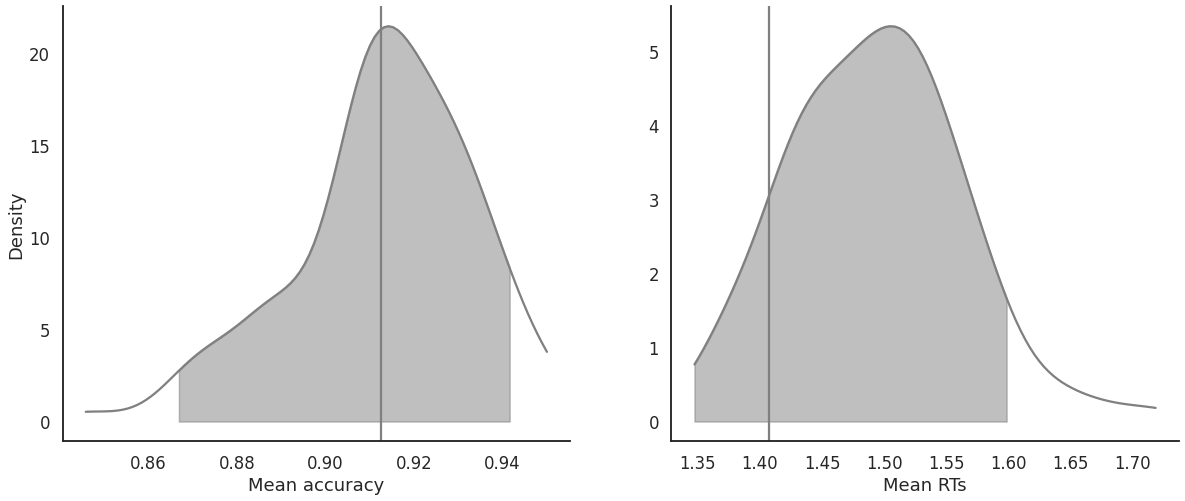

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

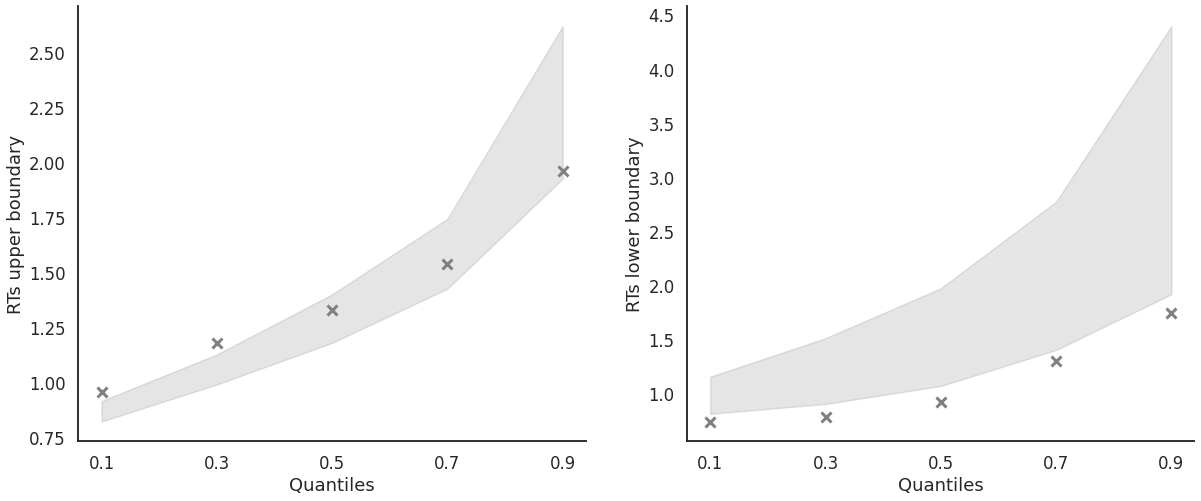

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.75  1.528486  2.125816   
                        2                0.85  1.674724  0.956828   
                        3                0.95  1.362106  1.660316   
                        4                0.80  2.003020  3.029053   
                        5                0.85  1.403032  1.483178   
...                                       ...       ...       ...   
3           CD          96               0.95  1.906108  1.303903   
                        97               0.85  1.218072  1.145406   
                        98               0.75  1.711861  1.400820   
                        99               0.90  1.496032  1.770244   
                        100              0.95  1.350431  2.199623   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.131136        0.998936   
                        2              1.332224        0.991424   
                        3              2.222606        1.047606   
                        4              2.180970        1.153370   
                        5              1.198732        1.144932   
...                                         ...             ...   
3           CD          96             2.889858        1.299458   
                        97             1.263922        0.933722   
                        98             1.502111        1.141511   
                        99             1.763282        1.131682   
                        100            3.471681        0.958081   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.239936        1.157936   
                        2              1.599824        1.297824   
                        3              2.222606        1.139606   
                        4              3.738370        1.320370   
                        5              1.220332        1.285332   
...                                         ...             ...   
3           CD          96             2.889858        1.576858   
                        97             1.363122        1.108122   
                        98             1.765311        1.357311   
                        99             1.797082        1.254582   
                        100            3.471681        1.132681   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              2.178336        1.541136  
                        2              2.173424        1.859824  
                        3              2.222606        1.270206  
                        4              5.537470        1.640870  
                        5              1.666332        1.453332  
...                                         ...             ...  
3           CD          96             2.889858        2.057858  
                        97             1.391922        1.351522  
                        98             2.029311        1.667111  
                        99             1.830882        1.559982  
                        100            3.471681        1.400881  

[1200 rows x 9 columns]

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.700000  1.664103  2.262957         1.059336   
           2            0.700000  1.396591  2.278174         1.023824   
           3            0.566667  1.682073  1.391473         1.034806   
           4            0.766667  1.900137  0.864684         2.065270   
           5            0.500000  1.532999  2.369281         0.918132   
...                          ...       ...       ...              ...   
8          96           1.000000  1.396458  0.315311              NaN   
           97           1.000000  1.359822  0.904828              NaN   
           98           0.966667  1.223811  1.092589         1.604311   
           99           1.000000  1.307915  0.470435              NaN   
           100          1.000000  1.409448  2.231213              NaN   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.168936         1.539936        1.370936   
           2             0.989824         1.121824        1.241824   
           3             1.176406         1.396606        1.375606   
           4             1.222670         2.611870        1.563870   
           5             1.229332         1.211332        1.376332   
...                           ...              ...             ...   
8          96            1.074658              NaN        1.281858   
           97            1.052522              NaN        1.271122   
           98            0.925911         1.604311        1.175311   
           99            1.006382              NaN        1.154082   
           100           0.966481              NaN        1.198181   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.723936        1.919936  
           2              1.527024        1.414824  
           3              2.158206        1.666806  
           4              3.042470        1.944870  
           5              1.543732        1.786532  
...                            ...             ...  
8          96                  NaN        1.689658  
           97                  NaN        1.536022  
           98             1.604311        1.284711  
           99                  NaN        1.599582  
           100                 NaN        1.363181  

[800 rows x 9 columns]

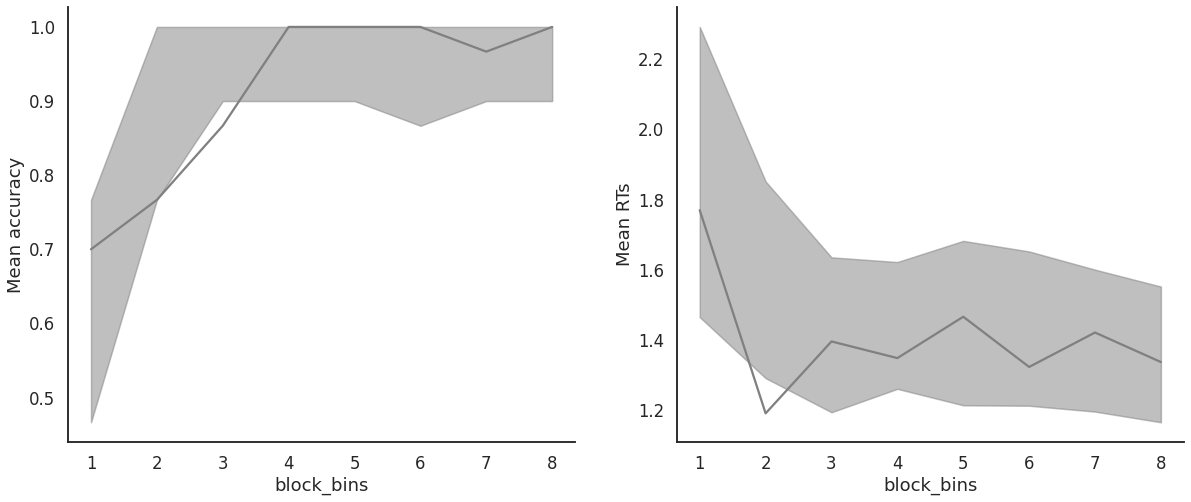

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

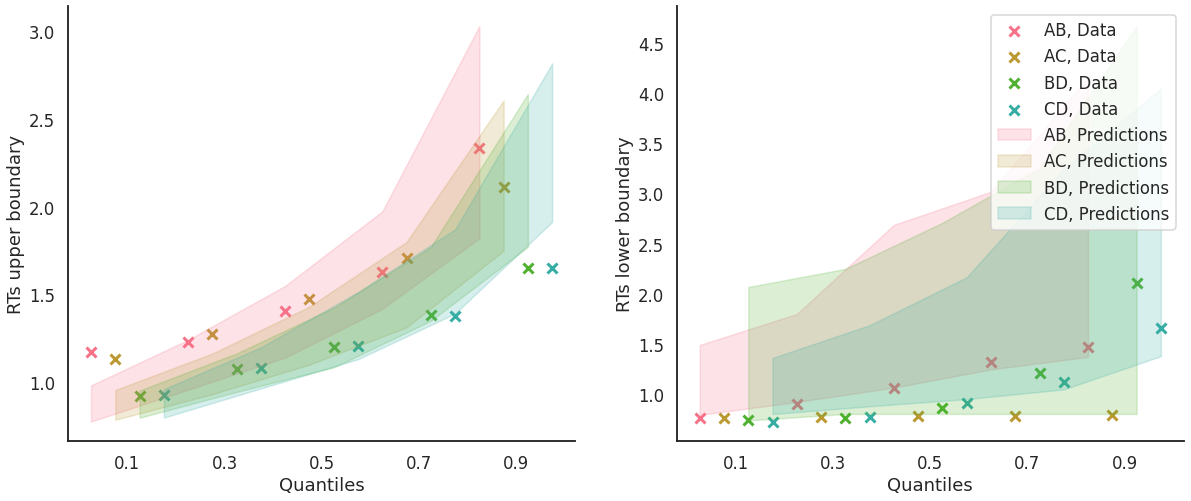

In [20]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

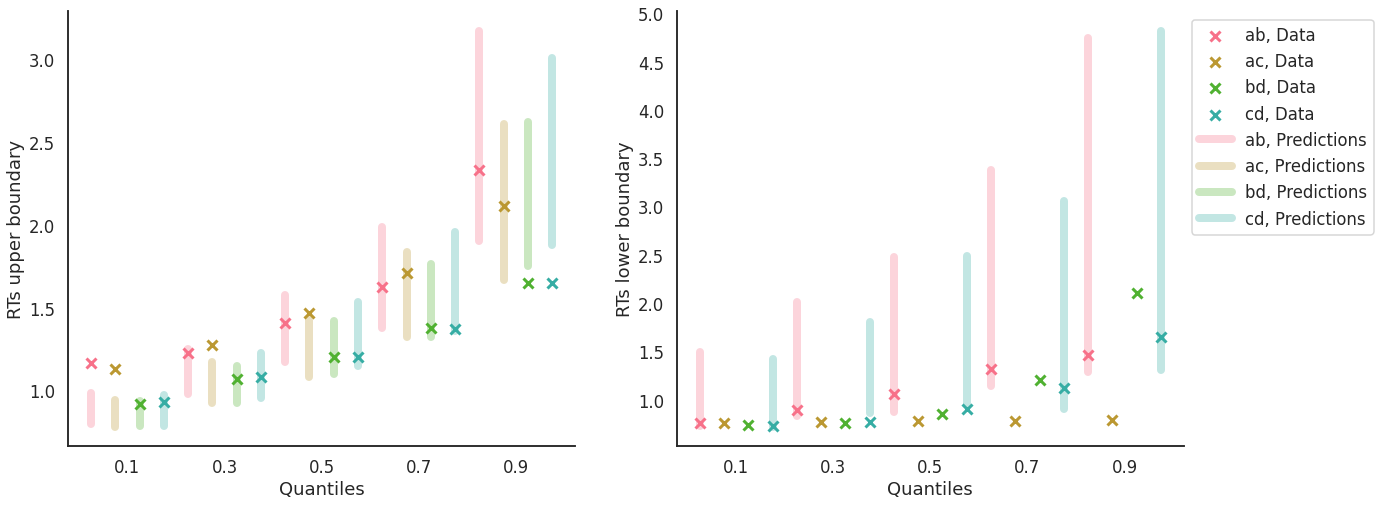

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);